In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000, method='closed_form', reg=None, alpha=0.01):
        self.lr = lr  # 学习率
        self.epochs = epochs  # 迭代次数
        self.method = method  # 方法：'closed_form'闭式解，'gradient_descent'梯度下降
        self.theta = None  # 参数
        self.reg = reg  # 正则化方法：None（无罚项），'l1'（L1正则），'l2'（L2正则）
        self.alpha = alpha  # 正则化参数
        self.loss_history = [] # Loss record

    def fit(self, X, y):
        # 添加偏置项
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.method == 'closed_form':
            # 闭式解
            if self.reg is None:
                # 无正则化
                self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            elif self.reg == 'l1':
                # L1正则化（Lasso）
                L = np.eye(X_b.shape[1])
                L[0, 0] = 0  # 不对偏置项进行惩罚
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * L).dot(X_b.T).dot(y)
            elif self.reg == 'l2':
                # L2正则化（Ridge）
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)
        elif self.method == 'gradient_descent':
            # 初始化参数
            self.theta = np.random.randn(X_b.shape[1], 1)
            # 梯度下降
            for _ in range(self.epochs):
                gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(self.theta) - y)
                if self.reg == 'l1':
                    # L1正则化（Lasso）
                    gradients[1:] += self.alpha * np.sign(self.theta[1:])
                elif self.reg == 'l2':
                    # L2正则化（Ridge）
                    gradients[1:] += 2 * self.alpha * self.theta[1:]
                self.theta -= self.lr * gradients
                loss = np.mean((X_b.dot(self.theta) - y) ** 2)
                self.loss_history.append(loss)
        else:
            raise ValueError("Unsupported method. Choose 'closed_form' or 'gradient_descent'.")

    def predict(self, X):
        # 添加偏置项
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

[[3.46479815]] [-2.97115376]
[[0.30378727]] [150.62351355]


/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

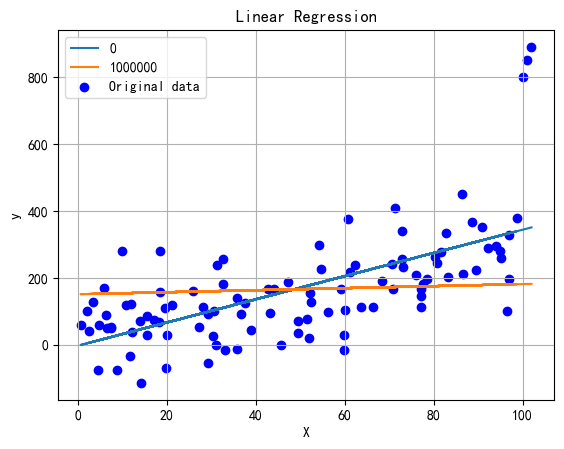

In [71]:
from sklearn.linear_model import Ridge
plt.scatter(X, y, color='blue', label='Original data')

for alpha in [0,1000000]:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    print(ridge_model.coef_,ridge_model.intercept_)
    plt.plot(X, ridge_model.predict(X), label=alpha)
# plt.plot(X, lin_reg_no_penalty_gd.predict(X), color='red', label='Gradient descent')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# 生成一些随机数据
np.random.seed(42)
X = 100 * np.random.rand(100, 1)
#造伪样本
# X=np.linspace(0,100,100)
y = 4 + 3 * X + np.random.randn(100, 1)*100
X_outliers = np.array([[100], [101], [102]])
y_outliers = np.array([[800], [850], [890]])
X = np.vstack((X, X_outliers))
y = np.vstack((y, y_outliers))
methods = ['closed_form','gradient_descent']
regs = [None,'l1','l2']
# 实例化并拟合模型
# 无罚项（普通线性回归）
models = {}
for m in methods:
    for r in regs:
        models['{}_{}'.format(m,r)] = LinearRegression(method=m,reg=r,alpha=20)
        models['{}_{}'.format(m,r)].fit(X,y)
        print('{}_{}'.format(m,r), models['{}_{}'.format(m,r)].theta.ravel())
        

# lin_reg_no_penalty_gd = LinearRegression(method='gradient_descent')
# lin_reg_no_penalty_gd.fit(X, y)
# print("No penalty (OLS) parameters(gradient_descent):", lin_reg_no_penalty_gd.theta.ravel())

# # L1正则化（Lasso）
# lin_reg_l1 = LinearRegression(method='closed_form', reg='l1', alpha=0.1)
# lin_reg_l1.fit(X, y)
# print("L1 penalty (Lasso) parameters:", lin_reg_l1.theta.ravel())

# # L2正则化（Ridge）
# lin_reg_l2 = LinearRegression(method='closed_form', reg='l2', alpha=0.1)
# lin_reg_l2.fit(X, y)
# print("L2 penalty (Ridge) parameters:", lin_reg_l2.theta.ravel())


closed_form_None [-2.97115376  3.46479815]
closed_form_l1 [-2.93612505  3.46407725]
closed_form_l2 [-1.74207559  3.44646507]
gradient_descent_None [nan nan]
gradient_descent_l1 [nan nan]
gradient_descent_l2 [nan nan]


/tmp/ipykernel_3141535/3516253013.py:45: RuntimeWarning: overflow encountered in square
  loss = np.mean((X_b.dot(self.theta) - y) ** 2)
/tmp/ipykernel_3141535/3516253013.py:44: RuntimeWarning: invalid value encountered in subtract
  self.theta -= self.lr * gradients
/home/jovyan/.local/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

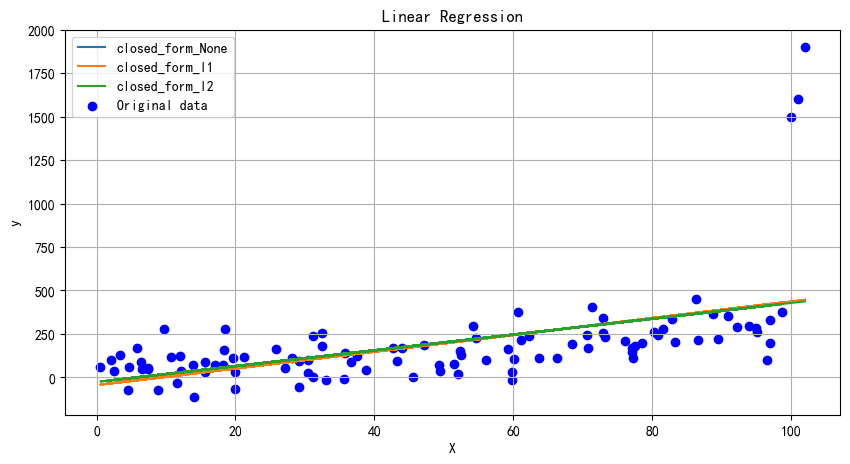

In [62]:
# Visualize data and fitted models
plt.figure(figsize=(10, 5))

# Scatter plot of original data
plt.scatter(X, y, color='blue', label='Original data')

# Fitted lines for closed-form solution and gradient descent
# for m in methods:
for r in regs:
    plt.plot(X, models['{}_{}'.format(methods[0],r)].predict(X), label='{}_{}'.format(methods[0],r))
# plt.plot(X, lin_reg_no_penalty_gd.predict(X), color='red', label='Gradient descent')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# # Plot loss change during gradient descent
# plt.figure(figsize=(8, 5))
# plt.plot(range(len(lin_reg_no_penalty_gd.loss_history)), lin_reg_no_penalty_gd.loss_history)
# plt.title('Gradient Descent Loss')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.grid(True)
# plt.show()


In [ ]:
df = pd.DataFrame({'solution':['closed_form','gradient_descent']})
for p in zip(lin_reg_closed_form.theta.ravel(),lin_reg_gradient_descent.theta.ravel(),['w','b'])
    df[p[-1]] = p[:-1]
df